In [1]:
import pandas as pd
import numpy as np

columns = [
    "white_king_file", "white_king_rank",
    "white_rook_file", "white_rook_rank",
    "black_king_file", "black_king_rank",
    "white_depth_of_win"
]

df = pd.read_csv(
    "krkopt.data",
    header=None,
    names=columns
)

df.head(3)


,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,white_depth_of_win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw


In [2]:
#Przygotowanie danych:
#Mapowanie pól liter na liczby 
mapa = {
    'a': 1, 'b': 2, 'c': 3, 'd': 4,
    'e': 5, 'f': 6, 'g': 7, 'h': 8
}

df["white_king_file_num"] = df["white_king_file"].map(mapa)
df["white_rook_file_num"] = df["white_rook_file"].map(mapa)
df["black_king_file_num"] = df["black_king_file"].map(mapa)

mapa_depth = {
    "draw": -1, "zero": 0, "one": 1,"two": 2,"three": 3,"four": 4,"five": 5,"six": 6,"seven": 7,"eight": 8,"nine": 9,
    "ten": 10,"eleven": 11,"twelve": 12,"thirteen": 13,"fourteen": 14,"fifteen": 15, "sixteen": 16
}

df["white_depth_of_win"] = df["white_depth_of_win"].map(mapa_depth)

df.head(3)


,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,white_depth_of_win,white_king_file_num,white_rook_file_num,black_king_file_num
0,a,1,b,3,c,2,-1,1,2,3
1,a,1,c,1,c,2,-1,1,3,3
2,a,1,c,1,d,1,-1,1,3,4


In [3]:
#odległość króli 3 metrykach 
dx = df["white_king_file_num"] - df["black_king_file_num"]
dy = df["white_king_rank"] - df["black_king_rank"]

# metryka euklidesowa
df["king_dist_euclides"] = (dx**2 + dy**2) ** 0.5
# metryka Manhattan
df["king_dist_manhattan"] = dx.abs() + dy.abs()
# metryka Czebyszewa
df["king_dist_czebyszew"] = np.maximum(dx.abs(), dy.abs())

df.head(5)

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,white_depth_of_win,white_king_file_num,white_rook_file_num,black_king_file_num,king_dist_euclides,king_dist_manhattan,king_dist_czebyszew
0,a,1,b,3,c,2,-1,1,2,3,2.236068,3,2
1,a,1,c,1,c,2,-1,1,3,3,2.236068,3,2
2,a,1,c,1,d,1,-1,1,3,4,3.000000,3,3
3,a,1,c,1,d,2,-1,1,3,4,3.162278,4,3
4,a,1,c,2,c,1,-1,1,3,3,2.000000,2,2


In [4]:
#minimalna odległość króla od krawędzi 

df["black_king_dist_edge"] = np.minimum.reduce([
    df["black_king_file_num"] - 1,
    8 - df["black_king_file_num"],
    df["black_king_rank"] - 1,
    8 - df["black_king_rank"]
])

df[[
    "black_king_file",
    "black_king_rank",
    "black_king_dist_edge"
]].head(5)

,black_king_file,black_king_rank,black_king_dist_edge
0,c,2,1
1,c,2,1
2,d,1,0
3,d,2,1
4,c,1,0


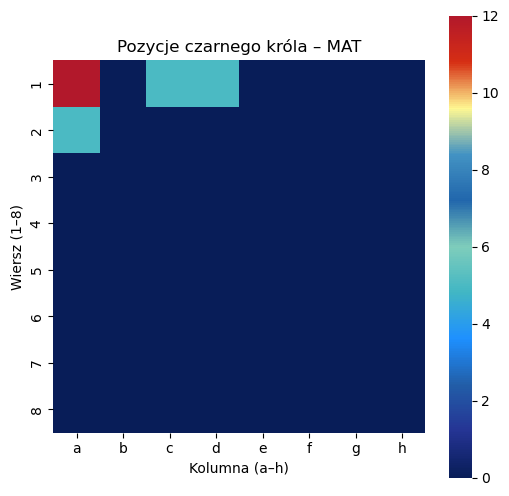

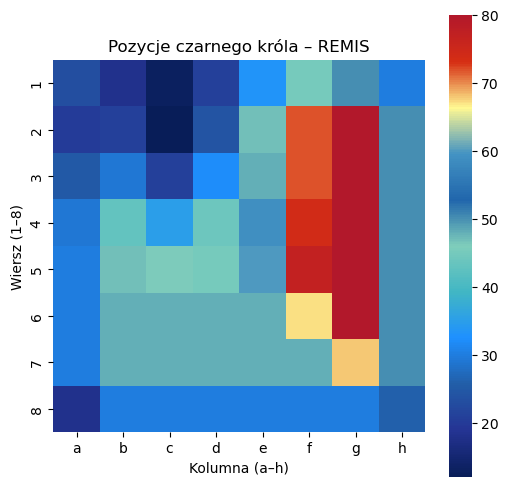

In [5]:
#Zadanie 1 
# Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? 
# Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# pastelowa mapa kolorów: cold (zielony) -> hot (czerwony)
pastel_cold_hot = LinearSegmentedColormap.from_list(
    "pastel_cold_hot",
    ["#081d58", "#253494", "#225ea8", "#1e90ff", "#41b6c4", "#7fcdbb", "#2166ac", "#4393c3", "#fff892", "#d62e14", "#b2182b"]  
)

for wartosc, tytul in [(0, "MAT"),
                       (-1, "REMIS")]:
    
    dane = df[df["white_depth_of_win"] == wartosc]

    heatmapa = pd.crosstab(
        dane["black_king_rank"],
        dane["black_king_file"]
    ).reindex(
        index=range(1, 9),              
        columns=list("abcdefgh"),       
        fill_value=0
    )

    plt.figure(figsize=(6, 6))
    sns.heatmap(
        heatmapa,
        cmap=pastel_cold_hot,
        square=True,
        cbar=True
    )

    plt.title(f"Pozycje czarnego króla – {tytul}")
    plt.xlabel("Kolumna (a–h)")
    plt.ylabel("Wiersz (1–8)")
    plt.show()


Na mapach ciepła przedstawiono częstość występowania pozycji czarnego króla na planszy szachowej w zależności od wyniku partii. Dla pozycji zakończonych matem (white_depth_of_win = 0) widoczna jest koncentracja wystąpień w określonych obszarach planszy. W przypadku remisów (white_depth_of_win = -1) rozkład pozycji czarnego króla jest bardziej równomierny i rozproszony. Różnice te wskazują, że położenie czarnego króla jest istotnie powiązane z końcowym wynikiem gry, niezależnie od szczegółowej analizy mechaniki szachowej. 

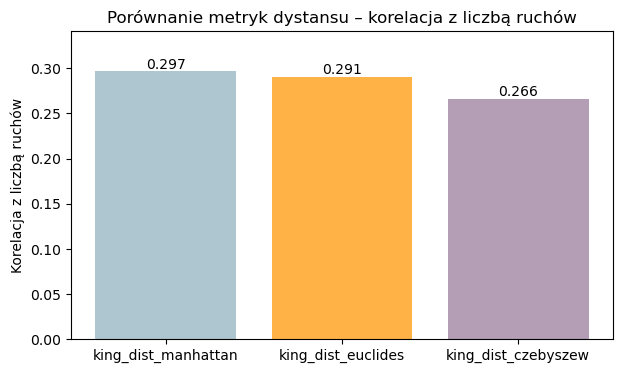

In [6]:
# Zadanie 2 
# Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry?


df_nd = df[df["white_depth_of_win"] != -1]


corr = df_nd[[
    "king_dist_euclides",
    "king_dist_manhattan",
    "king_dist_czebyszew",
    "white_depth_of_win"
]].corr()["white_depth_of_win"].drop("white_depth_of_win")

corr = corr.sort_values(ascending=False)


pastel_colors = ["#AEC6CF", "#FFB347", "#B39EB5"]  

plt.figure(figsize=(7, 4))
bars = plt.bar(corr.index, corr.values, color=pastel_colors[:len(corr)])

plt.ylabel("Korelacja z liczbą ruchów")
plt.title("Porównanie metryk dystansu – korelacja z liczbą ruchów")


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom"
    )

plt.ylim(0, corr.max() * 1.15)
plt.show()


Wykres słupkowy przedstawia porównanie korelacji pomiędzy liczbą ruchów do zakończenia gry a trzema metrykami dystansu. Najwyższą wartość korelacji uzyskano dla metryki Manhattan.

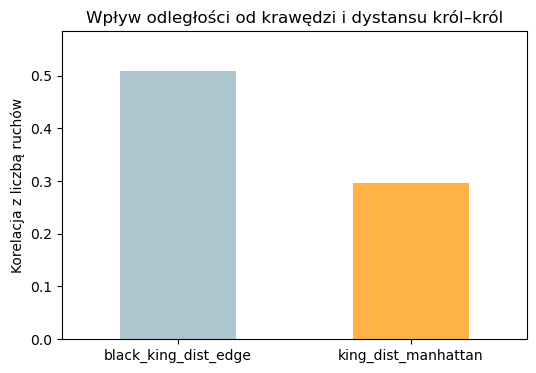

In [7]:
#Zadanie 3 
#Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? 
#Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc?

df_nd = df[df["white_depth_of_win"] != -1]

corr_edge = df_nd["black_king_dist_edge"].corr(df_nd["white_depth_of_win"])
corr_edge

corr_combo = df_nd[[
    "black_king_dist_edge",
    "king_dist_manhattan",
    "white_depth_of_win"
]].corr()["white_depth_of_win"].drop("white_depth_of_win")

corr_combo

plt.figure(figsize=(6, 4))

ax = corr_combo.sort_values(ascending=False).plot(
    kind="bar",
    color=["#AEC6CF", "#FFB347"]
)

plt.ylabel("Korelacja z liczbą ruchów")
plt.title("Wpływ odległości od krawędzi i dystansu król–król")

plt.xticks(rotation=0)

plt.ylim(0, corr_combo.max() * 1.15)
plt.show()



Analiza korelacji wskazuje, że odległość czarnego króla od krawędzi planszy ma związek z liczbą ruchów do zakończenia gry, co oznacza, że informacja ta może być przydatna przy estymacji długości partii. Jednocześnie dystans pomiędzy białym i czarnym królem wykazuje silniejszą zależność z liczbą ruchów. Zestawienie obu cech pozwala lepiej opisać długość gry niż wykorzystanie samej informacji o odległości od krawędzi.